<a href="https://colab.research.google.com/github/tcbic/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [200]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [201]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
#Let's create DataFrames for our data.

In [0]:
income_df = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan_df = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population_df = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities_df = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts_df = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [209]:
#What does our data look like?

income_df.shape, lifespan_df.shape, population_df.shape, entities_df.shape, concepts_df.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [210]:
income_df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [211]:
lifespan_df.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [212]:
population_df.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [213]:
#Add this code so that all columns are visible.
pd.options.display.max_columns = 500

entities_df.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [214]:
concepts_df.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
#We want to join the income, lifespan and population DataFrames.
#How can we do this?

three_df = pd.merge(pd.merge(income_df, lifespan_df), population_df)

#This could also be written as...
#three_df = pd.merge(income, lifespan)
#three_df = pd.merge(three_df, population)

In [216]:
#Let's look at our merged DataFrame.

three_df.shape

(40437, 5)

In [217]:
three_df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
#We still need the features: regions and nice, full name of the country.
#Both of these features are in the entities_df.

entities_df = entities_df[['country', 'name', 'world_6region']]

In [0]:
#Notice however that in order to merge this DataFrame with three_df, we'll need to rename the 'country'
#column in this DataFrame to 'geo'.

#Let's do that.


entities_df = entities_df.rename(columns={'country':'geo'})

In [220]:
#Yay, now we are set to merge!

data_df = pd.merge(three_df, entities_df)

data_df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,afg,1800,603,28.21,3280000,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,Afghanistan,south_asia


In [221]:
data_df.shape

(40437, 7)

In [222]:
#The geo column has served its purpose. We were able to merge our two DataFrames, however, this
#column does very little for us moving forward. We're going to go ahead and drop it.

data_df = data_df.drop(columns=['geo'])

data_df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
#At this time, we'll also rename the columns of this DataFrame for ease of use moving forward.

data_df = data_df.rename(columns={'time':'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
                        'life_expectancy_years':'lifespan', 'population_total':'population',
                        'name':'country', 'world_6region':'region'})

In [224]:
data_df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [225]:
#Given that we have a lot of data in this DataFrame, it's hard to think that we'd be able to summarize it into just one visualization.

data_df.shape

(40437, 6)

In [0]:
#If we wanted to replace _ in the region column:

data_df.region = data_df.region.str.replace('_', ' ')

In [227]:
data_df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south asia
1,1801,603,28.20,3280000,Afghanistan,south asia
2,1802,603,28.19,3280000,Afghanistan,south asia
3,1803,603,28.18,3280000,Afghanistan,south asia
4,1804,603,28.17,3280000,Afghanistan,south asia


## Explore data

In [228]:
data_df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
#Take a look at the mean and median(50%), specifically for the income column. What do you notice?
#There is quite a significant difference between the two: mean ~ 4619 and median is 1442.
#What does this imply? #Skewness. Because the mean (disproportionately affected by outliers) 
#is larger than the median, this implies a distribution that is skewed to the right.

In [230]:
#Let's get measures of the skewness for our columns.

#We notice population also has significant skew. This is because there are countries that have 
#a significant difference in population (i.e. large countries like China and India compared to smaller examples).

data_df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [231]:
#If we just wanted to look at just the year 2018 of all countries...

data_df[(data_df['year'] == 2018)]

,year,income,lifespan,population,country,region
218,2018,1867,58.69,36373176,Afghanistan,south asia
437,2018,5846,65.19,30774205,Angola,sub saharan africa
656,2018,12424,78.01,2934363,Albania,europe central asia
922,2018,68231,76.89,9541615,United Arab Emirates,middle east north africa
1141,2018,18942,76.97,44688864,Argentina,america
1360,2018,8662,75.97,2934152,Armenia,europe central asia
1579,2018,21035,77.60,103050,Antigua and Barbuda,america
1798,2018,45783,82.87,24772247,Australia,east asia pacific
2017,2018,44645,81.84,8751820,Austria,europe central asia
2236,2018,16552,72.30,9923914,Azerbaijan,europe central asia


In [232]:
#If we wanted to filter this DataFrame to only three years (1818, 1918 and 2018) and for the United States...

#First, let's filter the DataFrame for just the United States.

usa_df = data_df[data_df['country'] == 'United States']

#Check that we accomplished that. Looks good!

usa_df.head()

,year,income,lifespan,population,country,region
38028,1800,2127,39.41,6801854,United States,america
38029,1801,2167,39.41,6933517,United States,america
38030,1802,2202,39.41,7067728,United States,america
38031,1803,2166,39.41,7204538,United States,america
38032,1804,2165,39.41,7343995,United States,america


In [233]:
#Now, if we just want the years 1818, 1918 and 2018...

usa_df = usa_df[usa_df['year'].isin([1818, 1918, 2018])]

#Again, let's check. We did it!
usa_df.head()

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


## Plot visualization

## Analyze outliers

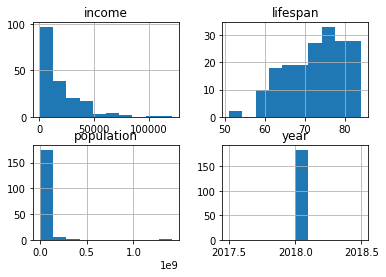

In [234]:
#Let's make a visualization for just 2018.

current_df = data_df[data_df['year'] == 2018]

current_df.hist();

#Notice that we can observe skewness in these plots, specifically for income, lifespan and population.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

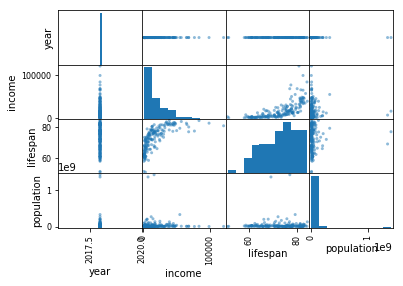

In [235]:
#Creating a visualization using the scatter matrix (similar to seaborn pairplot.)

pd.plotting.scatter_matrix(current_df);

We observe that income in relation to lifespan does not have a linear relationship.

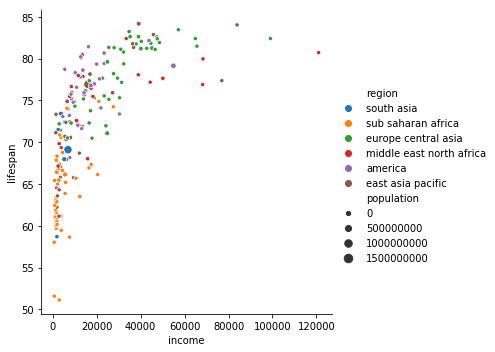

In [236]:
#Using the relplot in seaborn...
#Very useful plot, particularly when considering multiple dimensions!

import seaborn as sns

#We're assigning values to the parameters based on the example visualization from Gapminder.

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=current_df);

In [237]:
#Taking the log of income will even things out a little for our distribution.

#Creating a column for the log of income in our DataFrame.

current_df['log of income'] = np.log(current_df['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


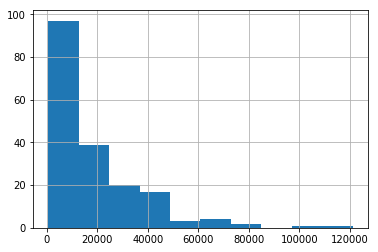

In [238]:
#To illustrate the difference in taking the log...

current_df.income.hist();

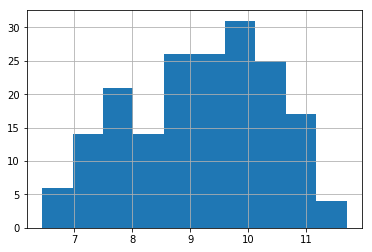

In [239]:
current_df['log of income'].hist();

#We see that taking the log of income normalizes the distribution.

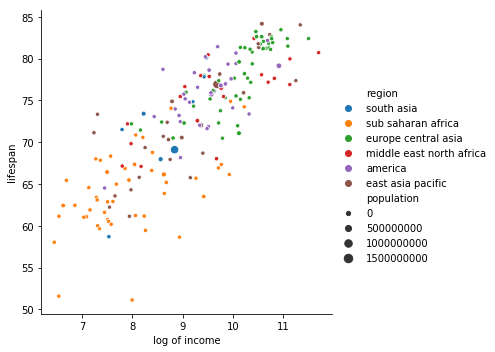

In [240]:
#If we were to change our seaborn plot using the log of income instead, this is what our visualization would look like...

sns.relplot(x='log of income', y='lifespan', hue='region', size='population', data=current_df);

#This visualization displays a much more linear distribution.Income tends to fall along an explonential distribution,
#so undoing that exponentiation using a log gives it a much more linear shape.

In [241]:
#How to point out a specific country and annotate it...

#For example, what countries log of income is greater than 11?

current_df[current_df['log of income'] > 11].sort_values(by='log of income')

,year,income,lifespan,population,country,region,log of income
27296,2018,64846,82.39,5353363,Norway,europe central asia,11.079771
16956,2018,65622,81.49,4803748,Ireland,europe central asia,11.091666
922,2018,68231,76.89,9541615,United Arab Emirates,middle east north africa,11.130654
20241,2018,68359,79.96,4197128,Kuwait,middle east north africa,11.132529
5521,2018,76943,77.36,434076,Brunei,east asia pacific,11.250820
31895,2018,83888,84.03,5791901,Singapore,east asia pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,europe central asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,middle east north africa,11.703819


In [242]:
#Qatar appears to be the wealthiest. Let's annotate it.
#To do that, we need to figure out where it's located.

#Grab Qatar from the DataFrame.

qatar = current_df[current_df['country'] == 'Qatar']

qatar

,year,income,lifespan,population,country,region,log of income
30362,2018,121033,80.71,2694849,Qatar,middle east north africa,11.703819


In [243]:
#Finding the coordinates to put our annotation for Qatar... 
#Reminder that our x-axis is log of income and our y-axis is lifespan.
#So, we need to Qatar's location for log of income and lifespan.

qatar_log_income = qatar['log of income'].iloc[0]

qatar_lifespan = qatar['lifespan'].iloc[0]

print(qatar_log_income, qatar_lifespan)

11.703818514668283 80.71


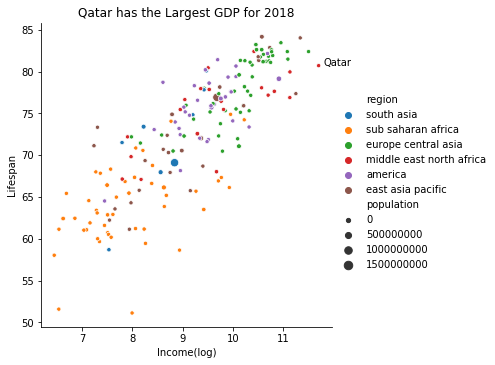

In [244]:
sns.relplot(x='log of income', y='lifespan', hue='region', size='population', data=current_df)
plt.text(x=qatar_log_income + .1, y=qatar_lifespan, s='Qatar')
plt.ylabel('Lifespan')
plt.xlabel('Income(log)')
plt.title('Qatar has the Largest GDP for 2018');

## Plot multiple years

In [0]:
#If we wanted to generate plots for our initial DataFrame for the three years we pulled data for above...
#Reminder that those years were 1818, 1918 and 2018.

#Let's grab our main DataFrame again!

data_df = data_df[data_df['year'].isin([1818, 1918, 2018])]

In [246]:
#And if we want to use the log of income as our x-axis, we need to create a new column for it in this DataFrame.

data_df['log of income'] = np.log(data_df['income'])

#Let's check that we created a new column in our DataFrame. Yep, there it is!

data_df

,year,income,lifespan,population,country,region,log of income
18,1818,604,28.03,3308390,Afghanistan,south asia,6.403574
118,1918,849,7.89,5704092,Afghanistan,south asia,6.744059
218,2018,1867,58.69,36373176,Afghanistan,south asia,7.532088
237,1818,668,26.98,1586896,Angola,sub saharan africa,6.504288
337,1918,1174,12.01,3487015,Angola,sub saharan africa,7.068172
437,2018,5846,65.19,30774205,Angola,sub saharan africa,8.673513
456,1818,669,35.40,435384,Albania,europe central asia,6.505784
556,1918,1478,19.49,953764,Albania,europe central asia,7.298445
656,2018,12424,78.01,2934363,Albania,europe central asia,9.427385
722,1818,1067,30.70,40153,United Arab Emirates,middle east north africa,6.972606


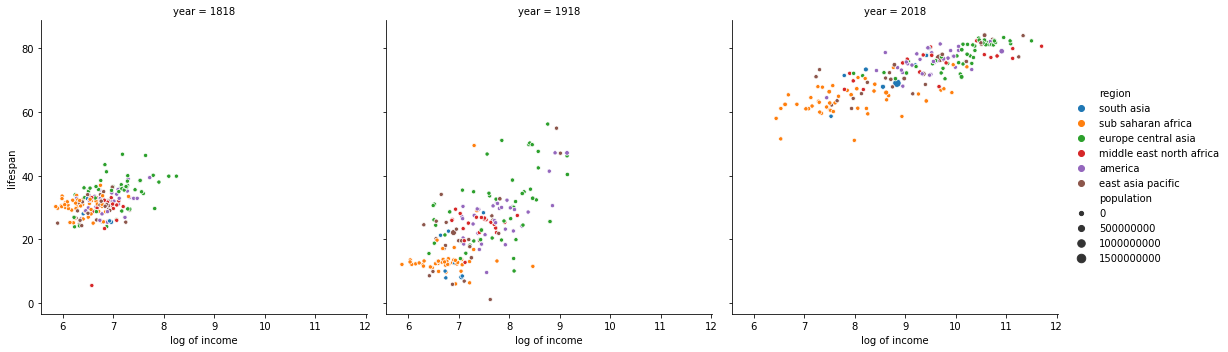

In [249]:
#Now for the visualization...

#Notice that we added the parameter'col', so that we would generate plots for each separate year.

sns.relplot(x='log of income', y='lifespan', hue='region', size='population', col='year', data=data_df);

## Point out a story

# ASSIGNMENT
Replicate the lesson code.

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site/project!